# Hackathon #1 - Binary Classification - Template
Always check the [Reference Document](https://docs.google.com/document/d/1A-1-UK9ol4tegfU4YQySEiBXBeqbx_tu1qdmiMAzNCM/edit?usp=sharing) for all information ;) 

Remember to keep your workflow consistent!

## Regarding the Data
- The dataset can be loaded with `load_data()` (check the already provided code below). It will output two dataframes:
  - `train`: labeled dataset (with target) 
  - `test`: unlabeled dataset (target is not available)
- You will use the `train` data to do your magic! When you are finished and have a predictive model you will have to make predictions using the `test` data and submit it to our platform (where you will get a AUC value - kind of what happens in Kaggle competitions). Check the file `submission_example.csv` for an example and the [Reference Document](https://docs.google.com/document/d/1A-1-UK9ol4tegfU4YQySEiBXBeqbx_tu1qdmiMAzNCM/edit?usp=sharing) for further information.
- You can and should perform train-test splits on the `train` data that you have available. Cross-validation is highly recommended. 
- The target name is `TomorrowRainForecast`: it is either 1 (rains tomorrow) and 0 (does not rain tomorrow).
- The `ID` is the identification variable which is very important for keeping track of the predictions you will make on the `test` data.

*Good luck,  
LDSA team*

In [13]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# some useful imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from utils import read_and_process
% autoreload 2
%matplotlib inline

In [3]:
def load_data(data_dir='../data/'):
    train = pd.read_csv(data_dir+'train.csv')
    test = pd.read_csv(data_dir+'test.csv')
    return train, test

# 1. Load Data
Load the `train` and `test` datasets

In [4]:
train, test = load_data()

In [5]:
train.head()

,ID,AmountRain,StrongWindDir,StrongWindSpeed,MorningWindDir,AfternoonWindDir,AfternoonWindSpeed,MorningHumidity,AfternoonHumidity,MorningTemp,AfternoonTemp,DidRainToday,DaysSinceNewYear,TomorrowRainForecast
0,5683,0.0,WSW,43.0,N,SW,17.0,82.0,51.0,15.4,20.8,No,268,0
1,2971,0.0,E,15.0,NaN,SE,7.0,91.0,63.0,9.7,16.6,No,136,0
2,3560,0.0,S,33.0,WSW,WSW,17.0,58.0,38.0,10.9,15.9,No,217,0
3,2304,10.0,NE,30.0,S,SSE,11.0,96.0,93.0,4.7,6.4,Yes,195,1
4,3573,0.0,WSW,48.0,NaN,SW,26.0,59.0,40.0,11.5,15.9,No,232,0


# Do your magic!

In [45]:
train, test = load_data()
y = train['TomorrowRainForecast']
X = read_and_process(train)
X.dtypes

AmountRain            float64
StrongWindSpeed       float64
AfternoonWindSpeed    float64
MorningHumidity       float64
AfternoonHumidity     float64
MorningTemp           float64
AfternoonTemp         float64
DaysSinceNewYear        int64
dtype: object

In [46]:
train.corr()

,ID,AmountRain,StrongWindSpeed,AfternoonWindSpeed,MorningHumidity,AfternoonHumidity,MorningTemp,AfternoonTemp,DaysSinceNewYear,TomorrowRainForecast
ID,1.000000,-0.016160,0.037269,-0.055471,-0.142584,-0.083427,0.203466,0.117583,-0.002389,-0.043637
AmountRain,-0.016160,1.000000,0.120379,0.071712,0.220821,0.289474,0.011808,-0.106580,-0.028822,0.226071
StrongWindSpeed,0.037269,0.120379,1.000000,0.676395,-0.342551,-0.182177,0.335497,0.207472,0.075996,0.184277
AfternoonWindSpeed,-0.055471,0.071712,0.676395,1.000000,-0.226015,-0.149089,0.168766,0.065961,0.102759,0.051544
MorningHumidity,-0.142584,0.220821,-0.342551,-0.226015,1.000000,0.693003,-0.542483,-0.508545,-0.051177,0.243563
AfternoonHumidity,-0.083427,0.289474,-0.182177,-0.149089,0.693003,1.000000,-0.369483,-0.636184,-0.007117,0.490275
MorningTemp,0.203466,0.011808,0.335497,0.168766,-0.542483,-0.369483,1.000000,0.868955,-0.185057,0.009734
AfternoonTemp,0.117583,-0.106580,0.207472,0.065961,-0.508545,-0.636184,0.868955,1.000000,-0.205700,-0.179632
DaysSinceNewYear,-0.002389,-0.028822,0.075996,0.102759,-0.051177,-0.007117,-0.185057,-0.205700,1.000000,-0.005390
TomorrowRainForecast,-0.043637,0.226071,0.184277,0.051544,0.243563,0.490275,0.009734,-0.179632,-0.005390,1.000000


In [47]:
clf = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
clf.fit(X_train.values,y_train.values)
roc_auc_score(y_test,clf.predict_proba(X_test.values)[:,1])

0.8505726468182156

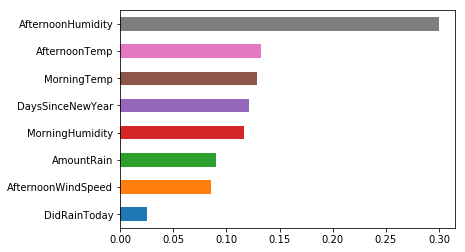

In [32]:
features_importance = pd.Series(index=X_train.columns,data=clf.feature_importances_)
features_importance.sort_values().plot.barh()

In [ ]:
result = test.copy()
result['TomorrowRainForecast'] = clf.predict_proba(X_submit)[:,1]
result[['ID','TomorrowRainForecast']].to_csv('../data/submission1.csv',index=False)